# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

## Customization Options for vizualizations
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

In [2]:
## Loading Objects from a Joblib File
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

In [3]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
dt_reg = loaded_joblib['DecisionTreeRegressor']

In [4]:
X_train_df.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,0.287374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Explain the tree-based model with shap

In [5]:
#init shap
shap.initjs()

In [6]:
# taking a sample of training data
SEED = 321
X_shap = shap.sample(X_train_df, nsamples= 500, random_state=SEED)
X_shap

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,0.708921,0.873252,-1.677139,0.287374,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2497,0.531075,0.418566,1.275305,-1.384048,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7723,1.100183,-0.986085,0.684178,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8117,-0.488577,-0.316610,1.616527,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7475,0.507362,-0.410893,-0.023898,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,-0.725705,1.474760,-1.468751,0.287374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2322,-0.049889,1.379431,0.282277,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3435,1.621865,-0.973438,0.710190,0.287374,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6561,-0.061746,-0.670765,0.488564,0.287374,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [7]:
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
3467     506.0080
2322    2888.2404
3435    5069.4012
6561    1030.6584
7431    3691.1952
Name: Item_Outlet_Sales, Length: 500, dtype: float64

In [8]:
# Creating a model explainer
explainer = shap.Explainer(dt_reg)
explainer

In [9]:
# Calculating the shap values for the  model
shap_values = explainer(X_shap, y_shap)
shap_values[0]

.values =
array([ 0.00000000e+00,  3.48474435e-01, -1.58498390e+03,  0.00000000e+00,
        2.60677622e+00,  0.00000000e+00, -3.88296000e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.62337325e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.43877547e+02, -7.45674157e+01,
       -1.11237930e+02])

.base_values =
array([2209.9793572])

.data =
array([ 0.70892131,  0.87325195, -1.67713926,  0.28737371,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [10]:
type(shap_values)

shap._explanation.Explanation

In [11]:
shap_values.shape

(500, 25)

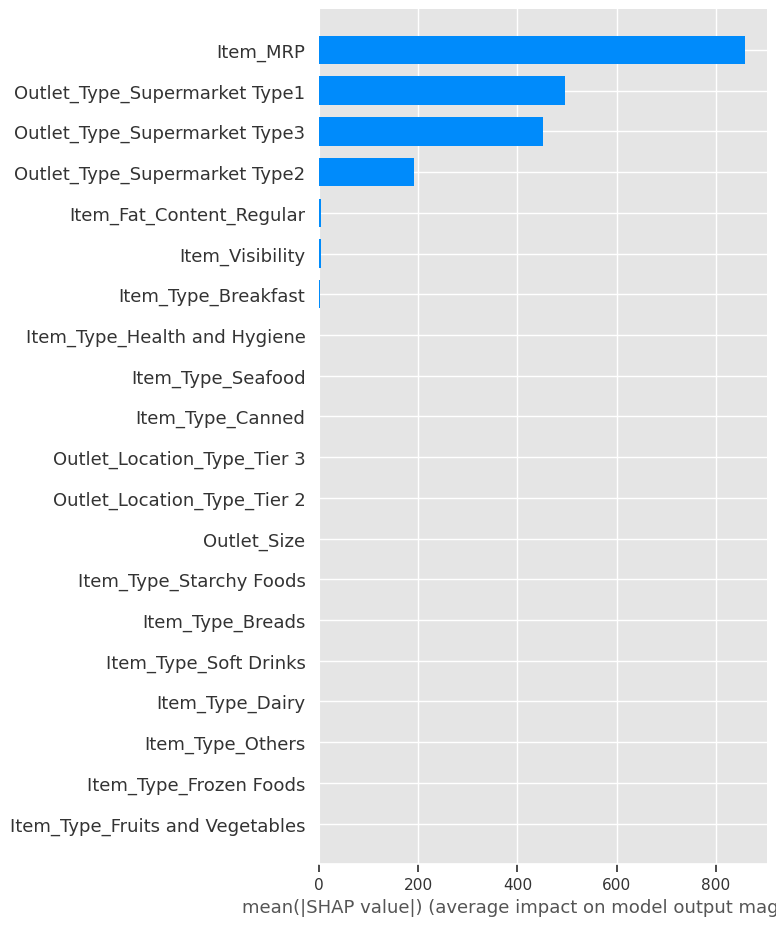

In [12]:
## create a summary plot (bar version)
ax= shap.summary_plot(shap_values, plot_type= 'bar', show= False)
plt.savefig('dt_reg_shap_summaryplot.png');

Feature Importance in Decision Tree Regression Model
![image](Decision%20Tree%20Regression%20Coeffiicents.png)

- In both shap summary plot and feature importance plot, the most important features are 'Item_MRP', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2' and 'Outlet_Type_Supermarket Type3'.
- The only differnce is the order of importance of type of the supermarket is difference in two plots.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


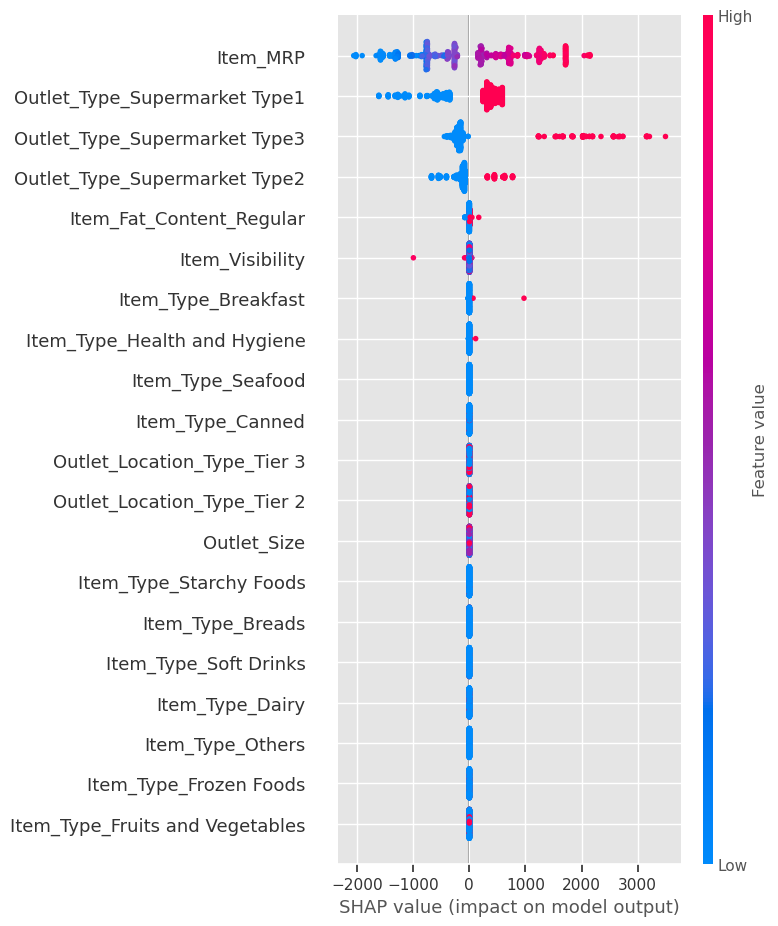

In [13]:
## create a summary plot (dot/default version)
shap.summary_plot(shap_values, show = False)
plt.savefig('dt_reg_shap_summaryplot_dot.png');

- Here Item_MRP is numerical feature while Outlet_Type features are generated by OneHotEncoder.
- According to the most important feature: Item_MRP;
    - Higher the Item_MRP higher the predicted sales value of the item
    - And it has a wide distribution
- According to the second most important feature: Outlet_Type_Supermarket Type1;   
    - If the item is in Type1 supermarket, the predicted sales value is higher
- According to the third most important feature: Outlet_Type_Supermarket Type3;   
    - If the item is in Type3 supermarket, the predicted sales value is higher 
    
    